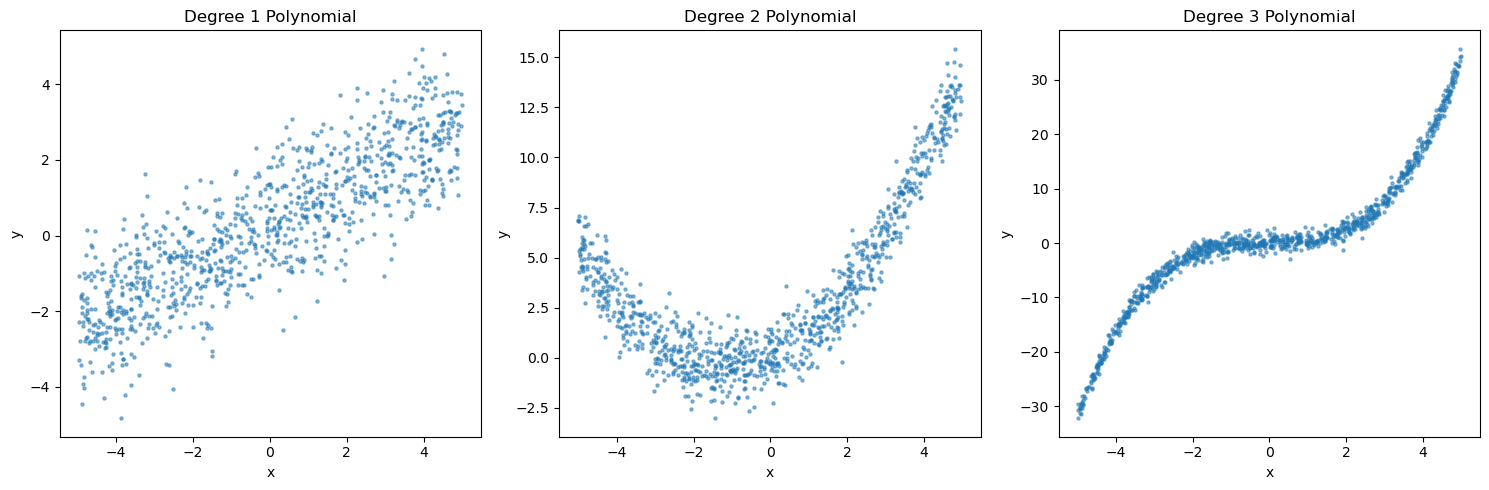

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_polynomial_data(degree, n_samples):
    """
    生成随机多项式数据集
    参数:
        degree: 多项式次数
        n_samples: 样本数
    返回:
        x: 形状为(n_samples, 1)的输入特征
        y: 形状为(n_samples,)的目标值
    """
    # 生成x，均匀分布在[-5, 5]
    x = np.random.uniform(-5, 5, n_samples)
    # 生成随机系数，均匀分布在[0, 1]
    coefficients = np.random.uniform(0, 1, degree + 1)
    # 计算y
    y = np.zeros(n_samples)
    for i in range(n_samples):
        # 多项式部分
        poly_sum = sum(coefficients[k] * x[i]**k for k in range(degree + 1))
        # 添加高斯噪声
        y[i] = poly_sum + np.random.normal(0, 1)
    return x[:, np.newaxis], y

# 测试函数并绘制数据集
np.random.seed(42)  # 固定随机种子以确保可重复性
degrees = [1, 2, 3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, degree in enumerate(degrees):
    x, y = generate_polynomial_data(degree, 1000)
    axes[i].scatter(x, y, s=5, alpha=0.5)
    axes[i].set_title(f'Degree {degree} Polynomial')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

plt.tight_layout()
plt.show()


In [14]:
#2
def create_polynomial_features(x, degree):
    """
    创建多项式特征矩阵，包含偏置项
    参数:
        x: 输入特征，形状为(n_samples,)
        degree: 多项式次数
    返回:
        X: 特征矩阵，形状为(n_samples, degree + 1)
    """
    X = np.ones((len(x), degree + 1))
    for k in range(1, degree + 1):
        X[:, k] = x**k
    return X

def ridge_regression_closed_form(X, y, alpha):
    """
    实现Ridge回归闭式解
    参数:
        X: 特征矩阵，形状为(n_samples, n_features)
        y: 目标值，形状为(n_samples,)
        alpha: 正则化参数
    返回:
        weights: 权重向量，形状为(n_features,)
    """
    n_features = X.shape[1]
    # 创建正则化矩阵，偏置项不正则化
    R = np.diag([0] + [1]*(n_features-1)) * alpha
    # 计算闭式解
    mat = np.dot(X.T, X) + R
    mat_inv = np.linalg.inv(mat)
    weights = np.dot(mat_inv, np.dot(X.T, y))
    return weights

def predict_ridge(X, weights):
    """
    使用Ridge回归权重进行预测
    参数:
        X: 特征矩阵
        weights: 权重向量
    返回:
        y_pred: 预测值
    """
    return np.dot(X, weights)

In [15]:
#3
# 生成三个数据集
np.random.seed(42)
linear_x, linear_y = generate_polynomial_data(1, 1000)
quadratic_x, quadratic_y = generate_polynomial_data(2, 1000)
cubic_x, cubic_y = generate_polynomial_data(3, 1000)

# 存储数据集
datasets = [
    (linear_x, linear_y, 1, "Linear"),
    (quadratic_x, quadratic_y, 2, "Quadratic"),
    (cubic_x, cubic_y, 3, "Cubic")
]

Dataset: Linear, Alpha: 0
Custom MSE: 0.9771, SGD MSE: 0.9788
Custom Weights: [0.28331788 0.53801028]
SGD Weights: [0.28462997 0.52402228]

Dataset: Linear, Alpha: 0.1
Custom MSE: 0.9771, SGD MSE: 0.9813
Custom Weights: [0.28331727 0.53800397]
SGD Weights: [0.25831523 0.51742408]

Dataset: Linear, Alpha: 100
Custom MSE: 0.9774, SGD MSE: 3.1986
Custom Weights: [0.28271017 0.53177313]
SGD Weights: [-0.00072772  0.03394255]

Dataset: Quadratic, Alpha: 0
Custom MSE: 0.9944, SGD MSE: 1.0338
Custom Weights: [0.03569648 0.8810473  0.39256983]
SGD Weights: [0.03351253 0.9042195  0.37634873]

Dataset: Quadratic, Alpha: 0.1
Custom MSE: 0.9944, SGD MSE: 1.0298
Custom Weights: [0.0357028  0.88103663 0.39256899]
SGD Weights: [0.03249736 0.89356174 0.37649527]

Dataset: Quadratic, Alpha: 100
Custom MSE: 0.9953, SGD MSE: 11.2045
Custom Weights: [0.04199722 0.87050589 0.39172759]
SGD Weights: [0.01227024 0.07631423 0.1898516 ]

Dataset: Cubic, Alpha: 0
Custom MSE: 0.9424, SGD MSE: 21188880517725090889

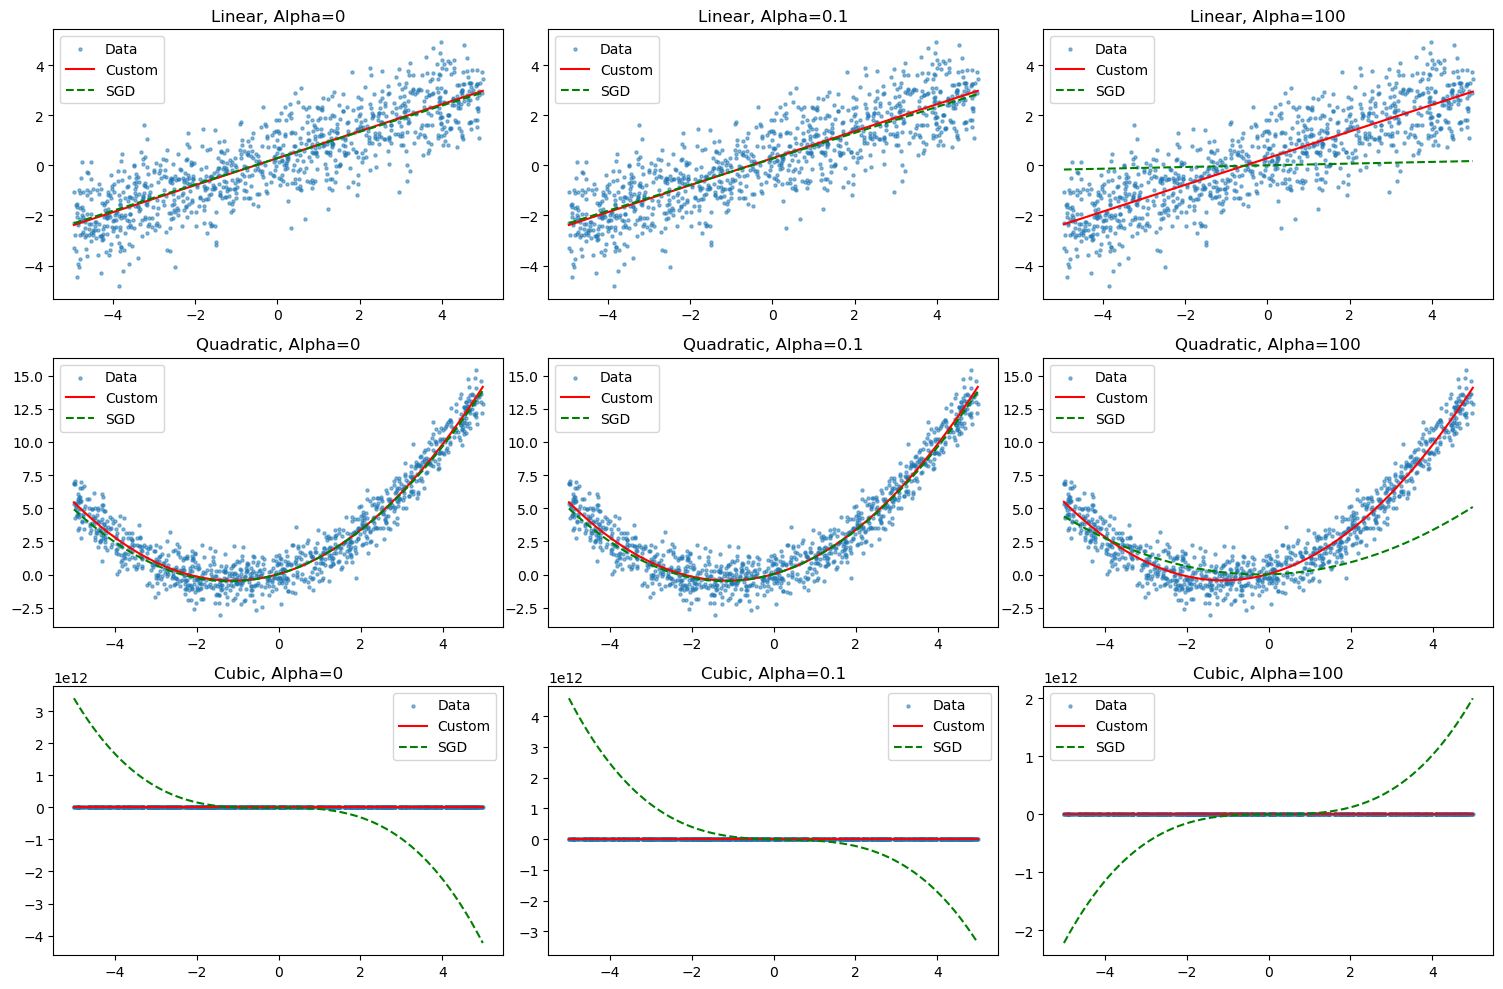

In [16]:
#4
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

alpha_values = [0, 0.1, 100]
results = []

for x, y, degree, name in datasets:
    X = create_polynomial_features(x.flatten(), degree)
    for alpha in alpha_values:
        # 自定义闭式解
        weights_custom = ridge_regression_closed_form(X, y, alpha)
        y_pred_custom = predict_ridge(X, weights_custom)
        mse_custom = mean_squared_error(y, y_pred_custom)
        
        # SGDRegressor
        model_sgd = SGDRegressor(penalty='l2', alpha=alpha, fit_intercept=False, max_iter=1000, tol=1e-3, random_state=42)
        model_sgd.fit(X, y)
        y_pred_sgd = model_sgd.predict(X)
        mse_sgd = mean_squared_error(y, y_pred_sgd)
        
        # 存储结果
        results.append({
            'Dataset': name,
            'Alpha': alpha,
            'Custom MSE': mse_custom,
            'SGD MSE': mse_sgd,
            'Custom Weights': weights_custom,
            'SGD Weights': model_sgd.coef_
        })

# 打印结果
for result in results:
    print(f"Dataset: {result['Dataset']}, Alpha: {result['Alpha']}")
    print(f"Custom MSE: {result['Custom MSE']:.4f}, SGD MSE: {result['SGD MSE']:.4f}")
    print(f"Custom Weights: {result['Custom Weights']}")
    print(f"SGD Weights: {result['SGD Weights']}")
    print()

# 绘制拟合结果
fig, axes = plt.subplots(len(datasets), len(alpha_values), figsize=(15, 10))
for i, (x, y, degree, name) in enumerate(datasets):
    X = create_polynomial_features(x.flatten(), degree)
    x_sorted = np.sort(x, axis=0)
    X_sorted = create_polynomial_features(x_sorted.flatten(), degree)
    for j, alpha in enumerate(alpha_values):
        # 自定义预测
        weights_custom = ridge_regression_closed_form(X, y, alpha)
        y_pred_custom = predict_ridge(X_sorted, weights_custom)
        # SGD预测
        model_sgd = SGDRegressor(penalty='l2', alpha=alpha, fit_intercept=False, max_iter=1000, tol=1e-3, random_state=42)
        model_sgd.fit(X, y)
        y_pred_sgd = model_sgd.predict(X_sorted)
        # 绘制
        axes[i, j].scatter(x, y, s=5, alpha=0.5, label='Data')
        axes[i, j].plot(x_sorted, y_pred_custom, 'r-', label='Custom')
        axes[i, j].plot(x_sorted, y_pred_sgd, 'g--', label='SGD')
        axes[i, j].set_title(f'{name}, Alpha={alpha}')
        axes[i, j].legend()
plt.tight_layout()
plt.show()

In [17]:
#6
# 测试高次多项式和更多样本
np.random.seed(42)
high_degree_x, high_degree_y = generate_polynomial_data(5, 5000)
X_high = create_polynomial_features(high_degree_x.flatten(), 5)

import time

# 比较拟合时间
alpha = 0.1
start_time = time.time()
weights_custom = ridge_regression_closed_form(X_high, high_degree_y, alpha)
custom_fit_time = time.time() - start_time

start_time = time.time()
model_sgd = SGDRegressor(penalty='l2', alpha=alpha, fit_intercept=False, max_iter=1000, tol=1e-3, random_state=42)
model_sgd.fit(X_high, high_degree_y)
sgd_fit_time = time.time() - start_time

# 比较预测时间
X_test = create_polynomial_features(np.linspace(-5, 5, 1000), 5)
start_time = time.time()
y_pred_custom = predict_ridge(X_test, weights_custom)
custom_pred_time = time.time() - start_time

start_time = time.time()
y_pred_sgd = model_sgd.predict(X_test)
sgd_pred_time = time.time() - start_time

# 计算MSE
y_pred_custom_train = predict_ridge(X_high, weights_custom)
y_pred_sgd_train = model_sgd.predict(X_high)
mse_custom = mean_squared_error(high_degree_y, y_pred_custom_train)
mse_sgd = mean_squared_error(high_degree_y, y_pred_sgd_train)

print(f"High Degree (5), n_samples=5000, Alpha={alpha}")
print(f"Custom MSE: {mse_custom:.4f}, SGD MSE: {mse_sgd:.4f}")
print(f"Custom Fit Time: {custom_fit_time:.4f}s, SGD Fit Time: {sgd_fit_time:.4f}s")
print(f"Custom Predict Time: {custom_pred_time:.4f}s, SGD Predict Time: {sgd_pred_time:.4f}s")

High Degree (5), n_samples=5000, Alpha=0.1
Custom MSE: 1.0374, SGD MSE: 114982596872031358881777057792.0000
Custom Fit Time: 0.0050s, SGD Fit Time: 0.0331s
Custom Predict Time: 0.0000s, SGD Predict Time: 0.0006s


In [18]:
#Part 2: Support Vector Classifier
#1
import pandas as pd

# 加载数据集
df = pd.read_csv('wdbc.data', header=None)

# 根据wdbc.names设置列名
columns = ['ID', 'diagnosis'] + [
    'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
    'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry',
    'mean_fractal_dimension', 'SE_radius', 'SE_texture', 'SE_perimeter', 'SE_area',
    'SE_smoothness', 'SE_compactness', 'SE_concavity', 'SE_concave_points', 'SE_symmetry',
    'SE_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
    'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points',
    'worst_symmetry', 'worst_fractal_dimension'
]
df.columns = columns

# 将诊断列映射为数值
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 检查前几行
print(df.head())

         ID  diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst_radius  worst_texture  worst_perimeter  wo

                 ID   diagnosis  mean_radius  mean_texture  mean_perimeter  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         mean_area  mean_smoothness  mean_compactness  mean_concavity  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min  

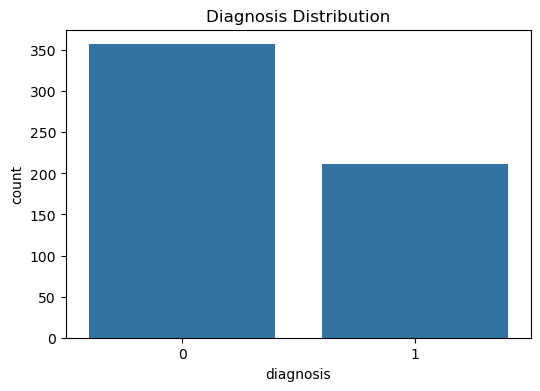

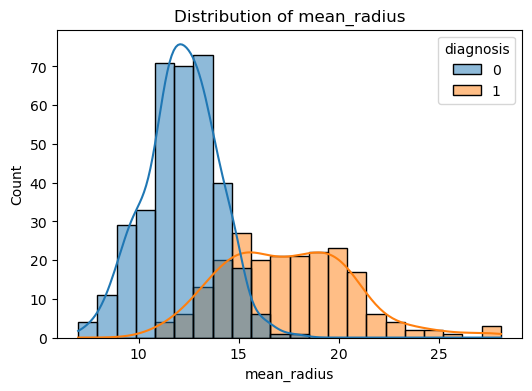

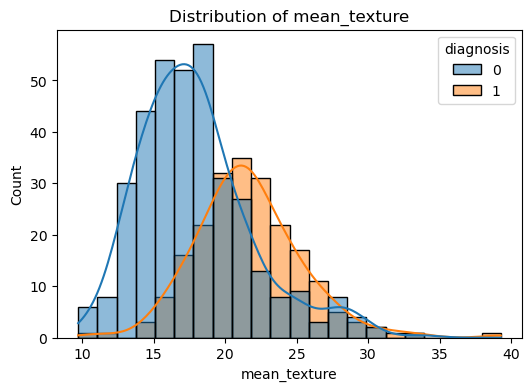

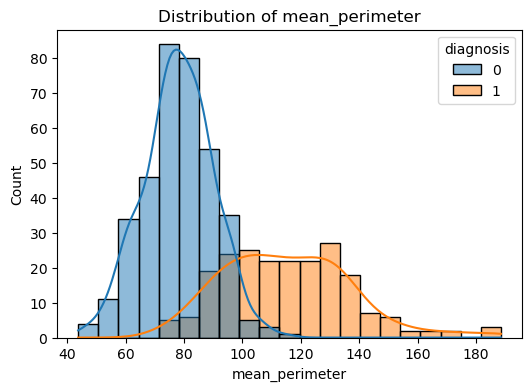

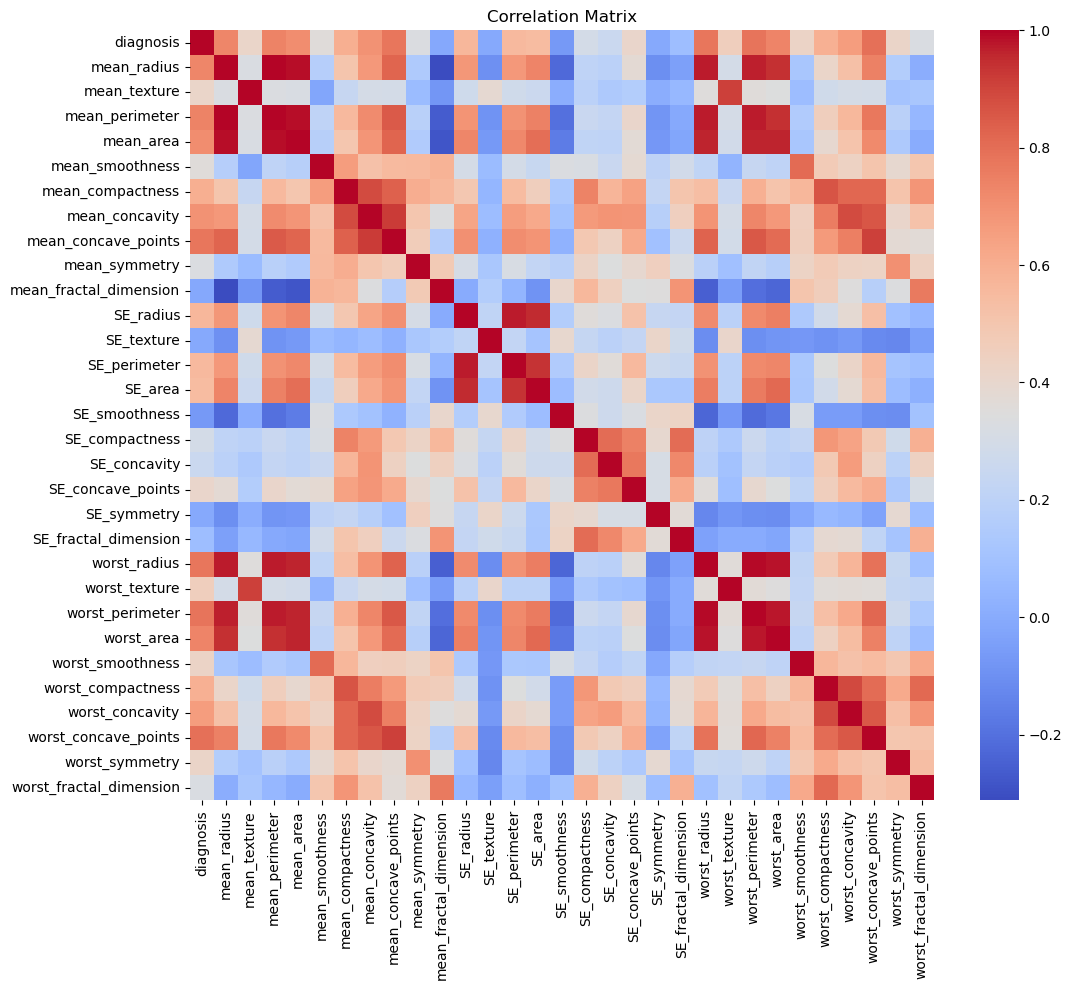

In [19]:
#2
import seaborn as sns
import matplotlib.pyplot as plt

# 基本统计分析
print(df.describe())

# 删除ID列
df = df.drop('ID', axis=1)

# 可视化诊断分布
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.show()

# 可视化部分特征分布
features = ['mean_radius', 'mean_texture', 'mean_perimeter']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 相关性矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [20]:
#3
from sklearn.model_selection import train_test_split

# 分离特征和目标
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 检查分割后类别分布
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Test set class distribution:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [21]:
#4
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义超参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1]
}

# 网格搜索
svc = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 输出结果
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale'}
Best Cross-Validation F1 Score: 0.966960456423372


In [22]:
#5
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 使用最佳模型预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)
print("Test Set F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Test Set Accuracy: 0.9736842105263158
Test Set F1 Score: 0.9629629629629629

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



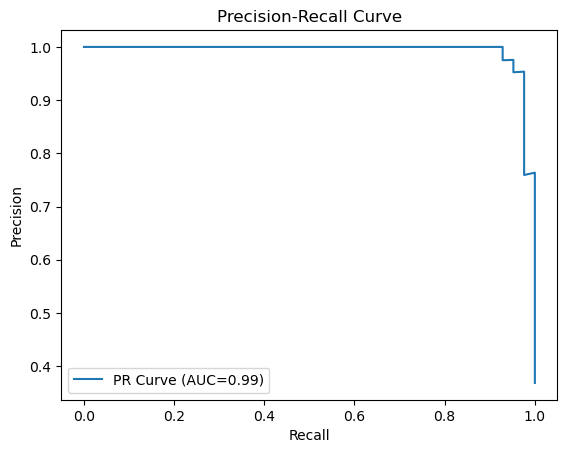

In [23]:
#6
from sklearn.metrics import precision_recall_curve, auc
y_scores = best_model.decision_function(X_test_scaled)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label=f'PR Curve (AUC={auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()